In [71]:
import numpy as np
import astropy.io.fits as pyf
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.style.use("dark_mode")

In [72]:
def compile_data():
    """
    A function to compile all the data for each parameter set
    """
    
    save_dirs = ['Ms_0p7__Ma_0p7',
                 'Ms_0p7__Ma_2p0',
                 'Ms_2p0__Ma_0p7',
                 'Ms_2p0__Ma_2p0']

    
    all_data = {}
    
    for save_dir in save_dirs:
        save_name = '/dens_t800'
        file = save_dir + save_name+'.fits.gz'
        hdulist = pyf.open(file)
        data = hdulist[0].data.astype(np.float64)
        data = np.abs((data - np.mean(data))/np.std(data))
        data = data / np.max(data)
        
        
        all_data[save_dir] = data
        
    return all_data

In [73]:
all_data = compile_data()

In [74]:
# #projected
# projected_data = np.sum(data, axis=2)

# #slices
# slice_data = data[128,:,:]

In [75]:


# data = all_data['Ms_0p7__Ma_0p7'][img_slice,:,:]
# plt.imshow(data / np.max(data), cmap='hot', origin='lower')
# plt.colorbar()
# plt.show()

# data = all_data['Ms_0p7__Ma_2p0'][img_slice,:,:]
# plt.imshow(data / np.max(data), cmap='hot', origin='lower')
# plt.colorbar()
# plt.show()

# data = all_data['Ms_2p0__Ma_0p7'][img_slice,:,:]
# plt.imshow(data / np.max(data), cmap='hot', origin='lower')
# plt.colorbar()
# plt.show()

# data = all_data['Ms_2p0__Ma_2p0'][img_slice,:,:]
# plt.imshow(data / np.max(data), cmap='hot', origin='lower')
# plt.colorbar()

# plt.show()

In [76]:
img_slice = 128

# data_temp = np.abs(all_data['Ms_2p0__Ma_0p7'][img_slice,:,:])

# min_, max_ = np.min(data_temp), np.max(data_temp)
# print(min_, max_)

# data_temp = data_temp / np.max(data_temp)

# min_, max_ = np.min(data_temp), np.max(data_temp)
# print(min_, max_)

data_temp = all_data['Ms_0p7__Ma_0p7']
min_, max_ = np.min(data_temp), np.max(data_temp)
print(min_, max_)

1.2985891603743395e-10 1.0


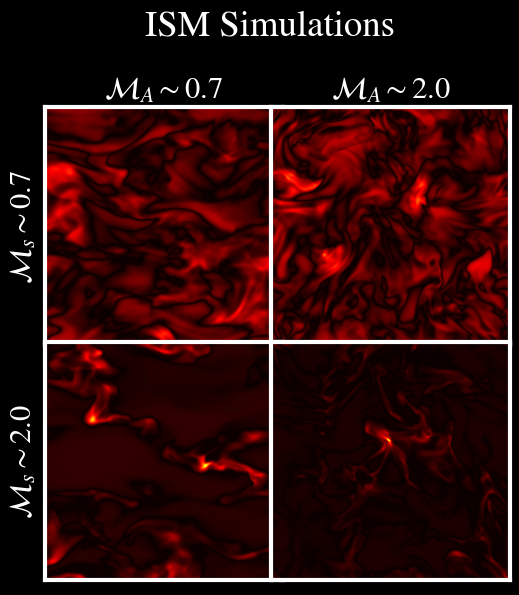

In [78]:
f, axes = plt.subplots(2,2,figsize=(6,7), gridspec_kw={'hspace':-0.2, 'wspace':-0.05})

f.suptitle("ISM Simulations")

img_slice = 128
cmap_ = 'hot'
vmin, vmax = 0,1

#AXES[0,0]
data = all_data['Ms_0p7__Ma_0p7'][img_slice,:,:]
# data = np.mean(all_data['Ms_0p7__Ma_0p7'], axis=0)

axes[0,0].set_xticklabels([]), axes[0,0].set_yticklabels([])
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,0].set_ylabel("$\mathcal{M}_s \sim 0.7$",fontsize=22)
axes[0,0].set_title("$\mathcal{M}_A \sim 0.7$", fontsize=22)
# axes[0,0].imshow(np.log(data), cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)
axes[0,0].imshow(data, cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)


#AXES[0,1]
data = all_data['Ms_0p7__Ma_2p0'][img_slice,:,:]
# data = np.mean(all_data['Ms_0p7__Ma_2p0'], axis=0)
axes[0,1].set_xticklabels([]), axes[0,1].set_yticklabels([])
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
# axes[0,1].set_ylabel("$\mathcal{M}_s \sim 0.7$",fontsize=22)
axes[0,1].set_title("$\mathcal{M}_A \sim 2.0$", fontsize=22)
# axes[0,1].imshow(np.log(data), cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)
axes[0,1].imshow(data, cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)

#AXES[1,0]
data = all_data['Ms_2p0__Ma_0p7'][img_slice,:,:]
# data = np.mean(all_data['Ms_2p0__Ma_0p7'], axis=0)
axes[1,0].set_xticklabels([]), axes[1,0].set_yticklabels([])
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,0].set_ylabel("$\mathcal{M}_s \sim 2.0$",fontsize=22)
# axes[1,0].set_title("$\mathcal{M}_A \sim 0.7$", fontsize=22)
# axes[1,0].imshow(np.log(data), cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)
axes[1,0].imshow(data, cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)

#AXES[1,1]
data = all_data['Ms_2p0__Ma_2p0'][img_slice,:,:]
# data = np.mean(all_data['Ms_2p0__Ma_2p0'], axis=0)
axes[1,1].set_xticklabels([]), axes[1,1].set_yticklabels([])
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
# axes[1,1].set_ylabel("$\mathcal{M}_s \sim 2.0$",fontsize=22)
# axes[1,1].set_title("$\mathcal{M}_A \sim 2.0$", fontsize=22)
# axes[1,1].imshow(np.log(data), cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)
axes[1,1].imshow(data, cmap=cmap_, origin='lower', vmin=vmin, vmax=vmax)

plt.show()




In [54]:
import sarabande

In [55]:
sarabande.check_install()


Checking to see if sarabande is properly imported... 

a simple function to make sure this module works.

Now running configuration tests... 

sarabande has been succesfully installed.


# Projected 3PCF

In [69]:
nbins = 20
m_max = 10
rmax = 128
            

proj_3pcf = sarabande.measure(nPCF=3, projected=True, m_max=m_max, density_field_data=all_data['Ms_0p7__Ma_0p7'][img_slice,:,:], 
                              nbins=nbins, physical_boxsize=256, rmin=1, rmax=rmax, normalize=True, save_name='test', save_dir='')

sarabande.calc_zeta(proj_3pcf,verbose_flag=False)

Preparing the data:

Finished Calculating the Projected 3PCF in 0.9428 seconds


In [57]:
proj_3pcf.zeta.shape

(11, 10, 10)

In [58]:

def runningMean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

### Compare Simulations

In [59]:
nbins = 20
m_max = 10
rmax = 128
runs = ['Ms_0p7__Ma_0p7',
        'Ms_0p7__Ma_2p0',
        'Ms_2p0__Ma_0p7',
        'Ms_2p0__Ma_2p0']
            

all_proj_data_3pcf = {}
sawtooth_data = {}

for i in range(4):

    proj_3pcf = sarabande.measure(nPCF=3, projected=True, m_max=m_max, density_field_data=np.mean(all_data[runs[i]], axis=0), 
                                  nbins=nbins, physical_boxsize=256, rmin=1, rmax=rmax, normalize=True, save_name='test', save_dir='')
    
    # proj_3pcf = sarabande.measure(nPCF=3, projected=True, m_max=m_max, density_field_data=all_data[runs[i]][128,:,:], 
    #                               nbins=nbins, physical_boxsize=256, rmin=1, rmax=rmax, normalize=True, save_name='test', save_dir='')

    sarabande.calc_zeta(proj_3pcf,verbose_flag=False)
    
    all_proj_data_3pcf[runs[i]] = proj_3pcf.zeta

Preparing the data:

Finished Calculating the Projected 3PCF in 0.4662 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.4403 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.4344 seconds
Preparing the data:

Finished Calculating the Projected 3PCF in 0.4362 seconds


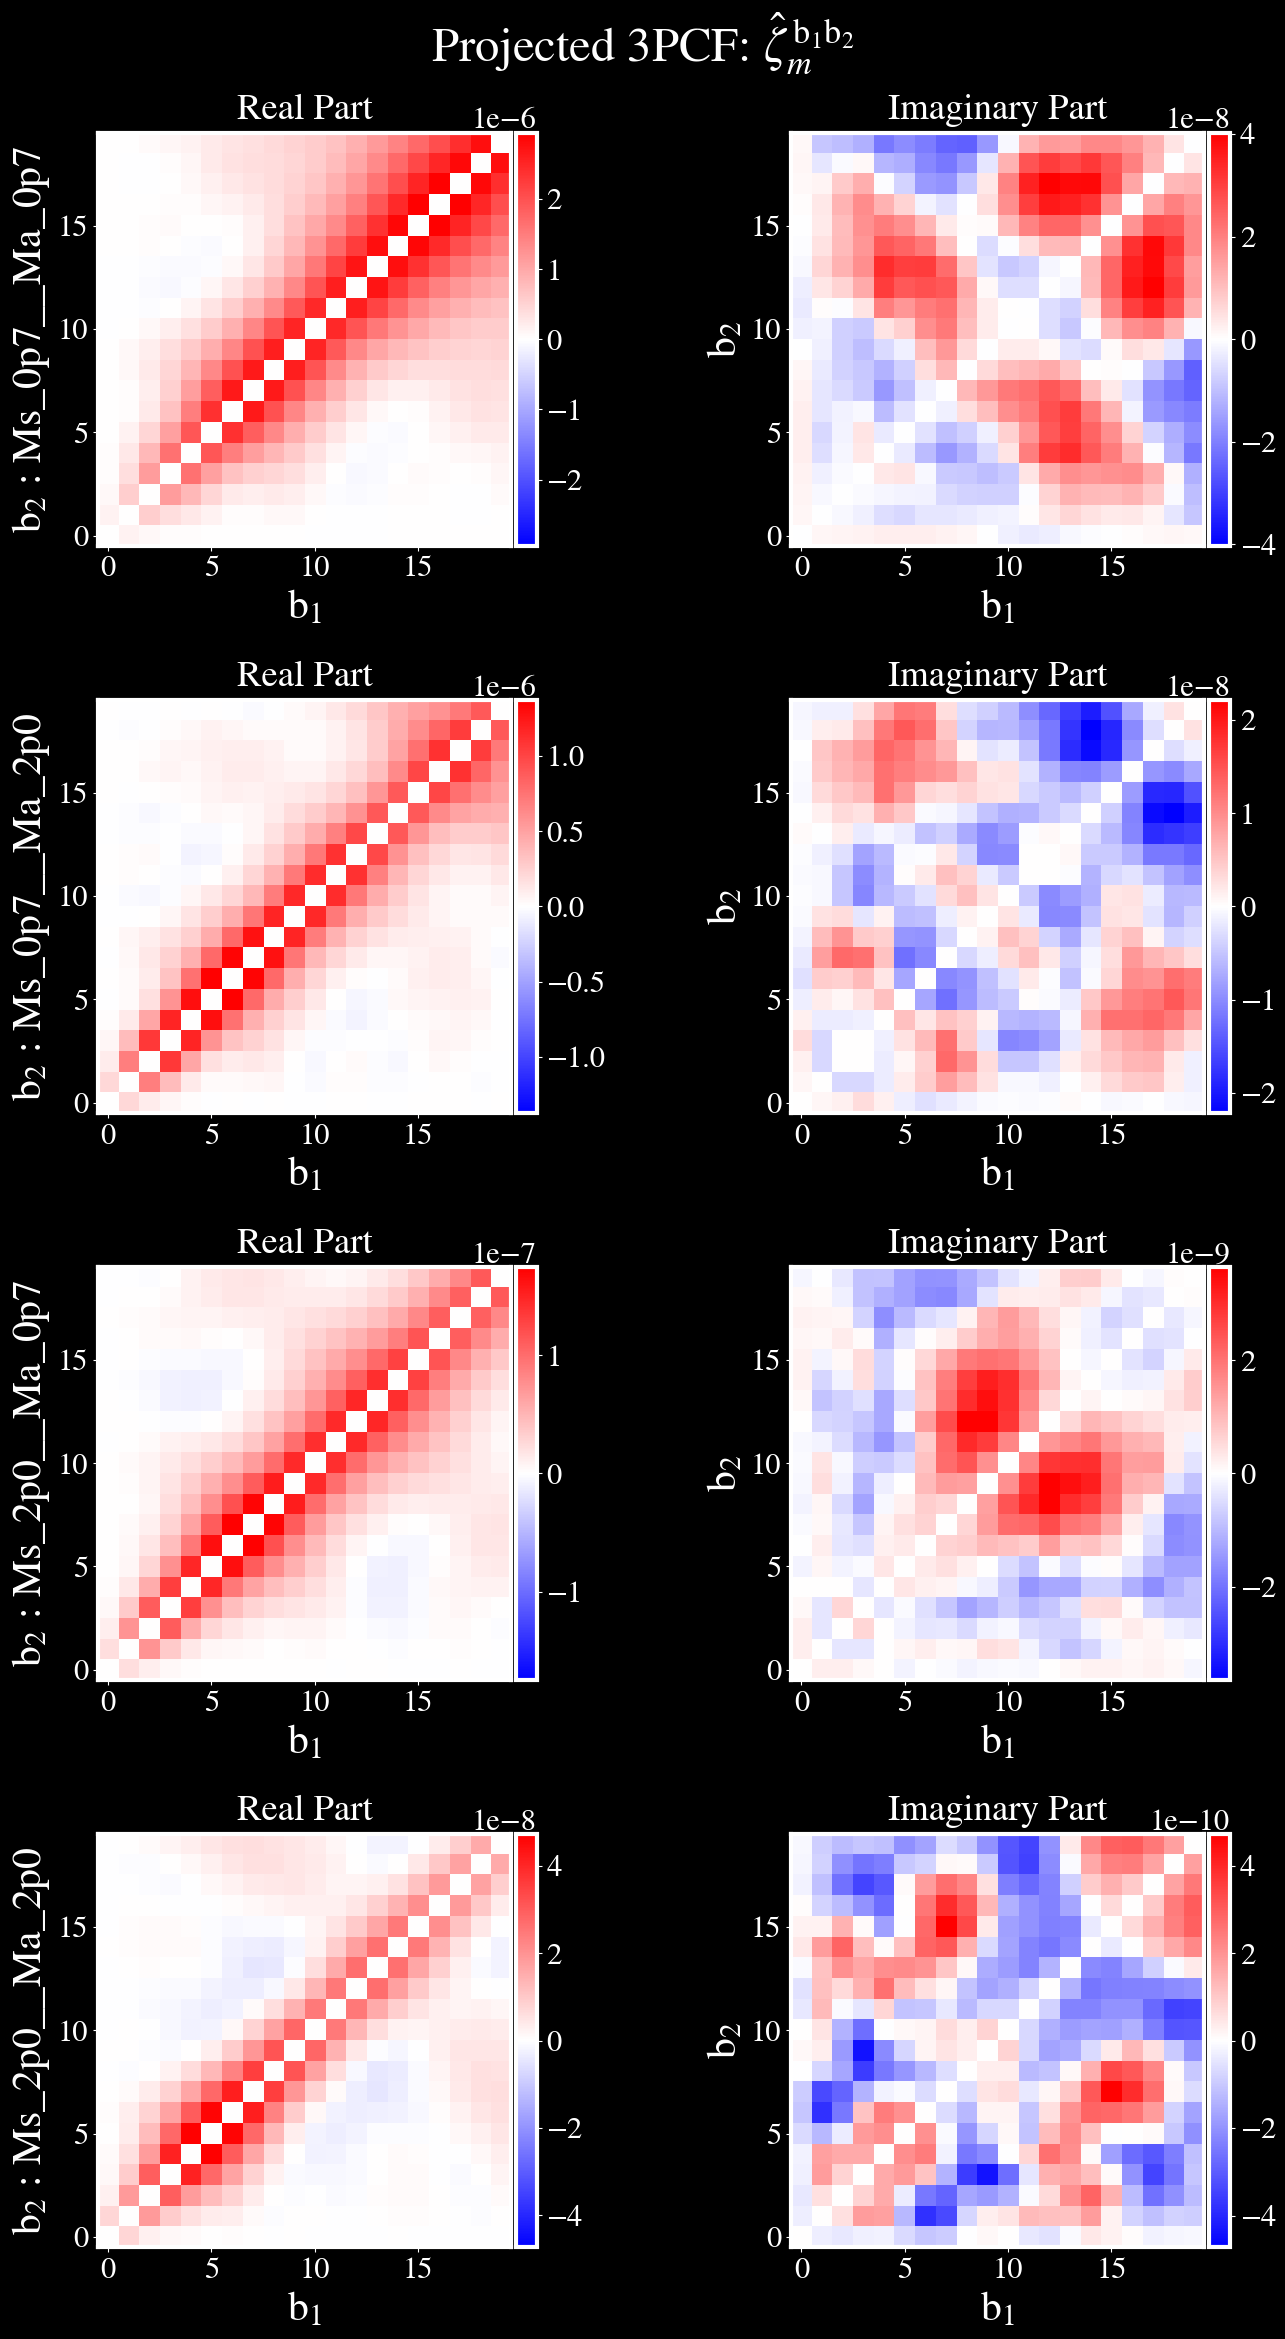

In [65]:
m = 3


fig, ax = plt.subplots(4,2, figsize=(14,24))

for i in range(4):
    
    img = all_proj_data_3pcf[runs[i]][m, :,:]
    
    # Real Part (left)
    im1 = ax[i,0].imshow(img.real, origin='lower', cmap='bwr',vmin= -np.max(np.abs(img.real)),vmax= np.max(np.abs(img.real)))
    ax[i,0].set_title("Real Part", pad = 10)
    ax[i,0].set_xlabel("$\mathrm{b}_1$", fontsize=30)
    ax[i,0].set_ylabel("$\mathrm{b}_2$ : " + runs[i], fontsize=30)
    divider1 = axgrid.make_axes_locatable(ax[i,0])
    cax1 = divider1.append_axes("right", size='5%', pad=0.05)
    plt.colorbar(im1, cax=cax1)

    # Imaginary Part (right)
    im2 = ax[i,1].imshow(img.imag, origin='lower', cmap='bwr',vmin= -np.max(np.abs(img.imag)),vmax= np.max(np.abs(img.imag)))
    ax[i,1].set_title("Imaginary Part", pad = 10)
    ax[i,1].set_xlabel("$\mathrm{b}_1$", fontsize=30)
    ax[i,1].set_ylabel("$\mathrm{b}_2$", fontsize=30)
    divider2 = axgrid.make_axes_locatable(ax[i,1])
    cax2 = divider2.append_axes("right", size='5%', pad=0.05)
    plt.colorbar(im2, cax=cax2)

fig.suptitle("Projected 3PCF: $\\hat{\\zeta}^{\; \\mathrm{b}_1 \\mathrm{b}_2}_m$", fontsize=35)    
fig.tight_layout()
plt.show()

In [66]:
bins = np.linspace(1, rmax, nbins)
average_bins= []
for i in range(len(bins)):
    if i >= 1:
        b_i = (bins[i] + bins[i-1]) /2 
    elif i == 0:
        b_i = bins[i]/2
        
    average_bins.append(b_i)
    
average_bins = np.array(average_bins)

def calc_sawtooth_3pcf(zeta, m_vals):
    m = int(m_vals[0])
    zeta_l_1d, bin_indexes, b_i = [], [], 0
    for b1 in range(0,nbins):
        for b2 in range(b1+1, nbins):
            value = zeta[m,b1,b2]
            # value *= average_bins[b1] * average_bins[b2] * average_bins[b3]
            zeta_l_1d.append(value)
            bin_indexes.append(b_i)
            b_i += 1
                
    bin_indexes = np.array(bin_indexes)
    zeta_l_1d = np.array(zeta_l_1d)
    return bin_indexes, zeta_l_1d

In [67]:
sawtooth_data_3pcf = {}

for i in range(4):
    bin_1d, zeta_1d = calc_sawtooth_3pcf(all_proj_data_3pcf[runs[i]].real, '4')
    sawtooth_data_3pcf[runs[i]] = [bin_1d, zeta_1d]

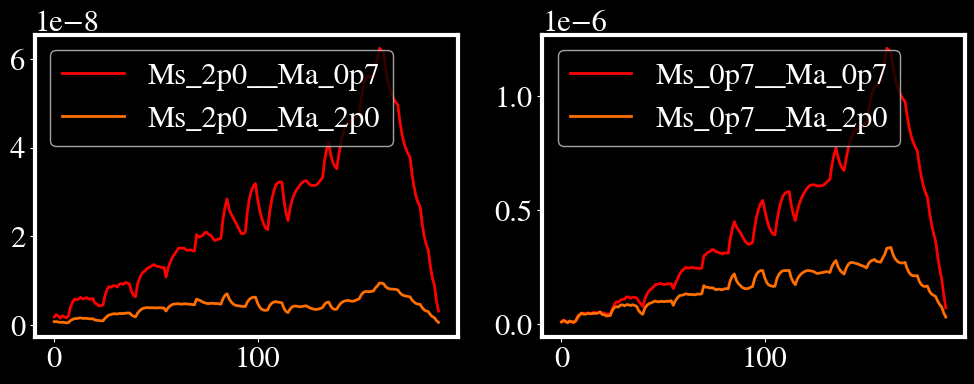

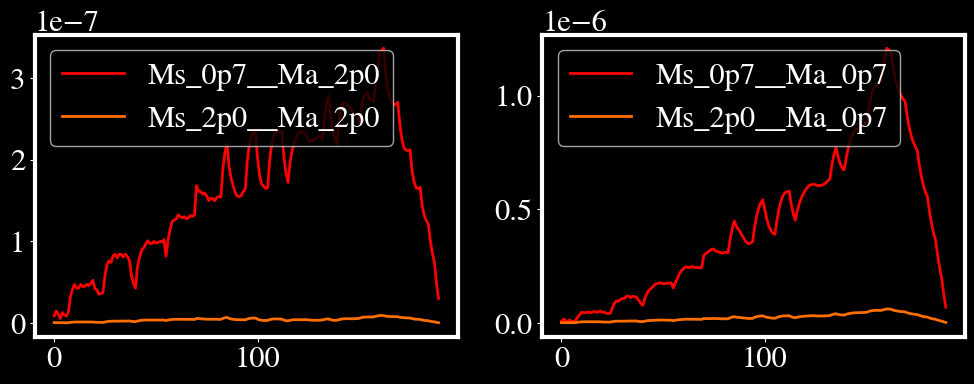

In [68]:
f, axes = plt.subplots(1,2, figsize=(12,4))
for i in range(4):
    bin_1d, zeta_1d = sawtooth_data_3pcf[runs[i]]
    # plt.plot(bin_1d, zeta_1d, label=runs[i])
    if i < 2:
        axes[1].plot(bin_1d, runningMean(zeta_1d, 30), linewidth=2, label=runs[i])
        
    if i >= 2: 
        axes[0].plot(bin_1d, runningMean(zeta_1d, 30), linewidth=2, label=runs[i])
        

# plt.semilogy()
    
axes[0].legend()
axes[1].legend()



f, axes = plt.subplots(1,2, figsize=(12,4))
for i in range(4):
    bin_1d, zeta_1d = sawtooth_data_3pcf[runs[i]]
    # plt.plot(bin_1d, zeta_1d, label=runs[i])
    if i == 0 or i == 2:
        axes[1].plot(bin_1d, runningMean(zeta_1d, 30), linewidth=2, label=runs[i])
        
    if i == 1 or i == 3: 
        axes[0].plot(bin_1d, runningMean(zeta_1d, 30), linewidth=2, label=runs[i])
        

# plt.semilogy()
    
axes[0].legend()
axes[1].legend()

# Projected 4PCF

### Test Run

In [66]:
nbins = 10
m_max = 10
rmax = 128
            

proj_4pcf = sarabande.measure(nPCF=4, projected=True, m_max=m_max, density_field_data=all_data['Ms_0p7__Ma_0p7'][img_slice,:,:], 
                              nbins=nbins, physical_boxsize=256, rmin=1, rmax=rmax, normalize=True, save_name='test', save_dir='')

sarabande.calc_zeta(proj_4pcf,verbose_flag=False)

Preparing the data:

Finished Calculating the Projected 4PCF in 11.1222 seconds


In [67]:
proj_4pcf.zeta.shape

(20, 20, 10, 10, 10)

### Compare Simulations

In [88]:
nbins = 20
m_max = 5
rmax = 128
runs = ['Ms_0p7__Ma_0p7',
        'Ms_0p7__Ma_2p0',
        'Ms_2p0__Ma_0p7',
        'Ms_2p0__Ma_2p0']
            

all_proj_data_4pcf = {}

for i in range(4):

    proj_4pcf = sarabande.measure(nPCF=4, projected=True, m_max=m_max, density_field_data=np.mean(all_data[runs[i]], axis=0), 
                                  nbins=nbins, physical_boxsize=256, rmin=1, rmax=rmax, normalize=True, save_name='test', save_dir='')
    
    # proj_4pcf = sarabande.measure(nPCF=4, projected=True, m_max=m_max, density_field_data=all_data[runs[i]][128,:,:], 
    #                               nbins=nbins, physical_boxsize=256, rmin=1, rmax=rmax, normalize=True, save_name='test', save_dir='')

    sarabande.calc_zeta(proj_4pcf,verbose_flag=False)
    
    all_proj_data_4pcf[runs[i]] = proj_4pcf.zeta

Preparing the data:

Finished Calculating the Projected 4PCF in 26.0354 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 25.9535 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 25.9294 seconds
Preparing the data:

Finished Calculating the Projected 4PCF in 26.1791 seconds


In [97]:
bins = np.linspace(1, rmax, nbins)
average_bins= []
for i in range(len(bins)):
    if i >= 1:
        b_i = (bins[i] + bins[i-1]) /2 
    elif i == 0:
        b_i = bins[i]/2
        
    average_bins.append(b_i)
    
average_bins = np.array(average_bins)

def calc_sawtooth_4pcf(zeta, m_vals):
    m_1, m_2 = int(m_vals[0]),int(m_vals[1])
    zeta_l_1d, bin_indexes, b_i = [], [], 0
    for b1 in range(0,nbins):
        for b2 in range(b1+1, nbins):
            for b3 in range(b2+1, nbins):
                value = zeta[m_1,m_2,b1,b2,b3]
                # value *= average_bins[b1] * average_bins[b2] * average_bins[b3]
                zeta_l_1d.append(value)
                bin_indexes.append(b_i)
                b_i += 1
                
    bin_indexes = np.array(bin_indexes)
    zeta_l_1d = np.array(zeta_l_1d)
    return bin_indexes, zeta_l_1d



In [139]:
sawtooth_data_4pcf = {}

for i in range(4):
    bin_1d, zeta_1d = calc_sawtooth_4pcf(all_proj_data_4pcf[runs[i]].real, '13')
    sawtooth_data_4pcf[runs[i]] = [bin_1d, zeta_1d]

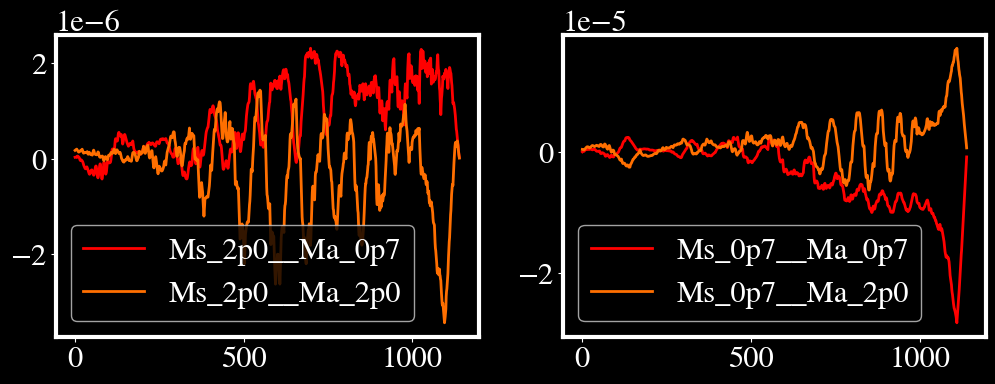

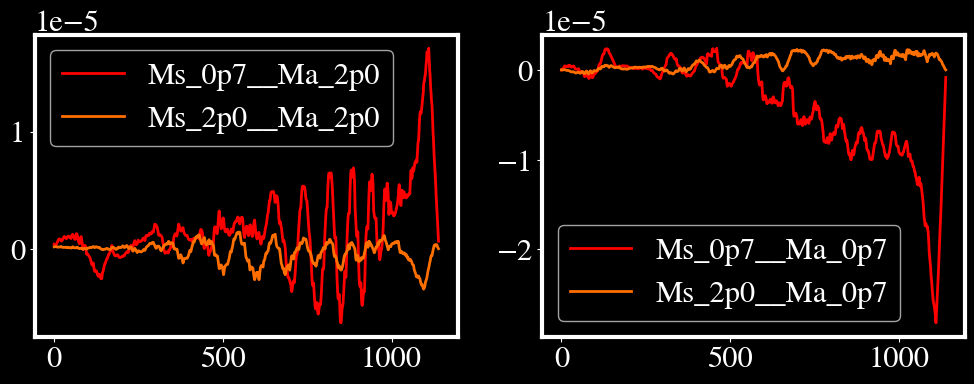

In [140]:
f, axes = plt.subplots(1,2, figsize=(12,4))
for i in range(4):
    bin_1d, zeta_1d = sawtooth_data_4pcf[runs[i]]
    # plt.plot(bin_1d, zeta_1d, label=runs[i])
    if i < 2:
        axes[1].plot(bin_1d, runningMean(zeta_1d, 30), linewidth=2, label=runs[i])
        
    if i >= 2: 
        axes[0].plot(bin_1d, runningMean(zeta_1d, 30), linewidth=2, label=runs[i])
        

# plt.semilogy()
    
axes[0].legend()
axes[1].legend()



f, axes = plt.subplots(1,2, figsize=(12,4))
for i in range(4):
    bin_1d, zeta_1d = sawtooth_data_4pcf[runs[i]]
    # plt.plot(bin_1d, zeta_1d, label=runs[i])
    if i == 0 or i == 2:
        axes[1].plot(bin_1d, runningMean(zeta_1d, 30), linewidth=2, label=runs[i])
        
    if i == 1 or i == 3: 
        axes[0].plot(bin_1d, runningMean(zeta_1d, 30), linewidth=2, label=runs[i])
        

# plt.semilogy()
    
axes[0].legend()
axes[1].legend()

## Interesting

There appears to be some interesting structure in the real components of the 3PCF and 4PCF, although it is not easy to tell immediately that the 4PCF would be significantly better at detecting non-gaussianity or in classifying MHD simulations. We will have to explore this using some Machine-Learning in the next notebook